# The Statistics of Ngau-ngau, a Chinese Gambling Card Game

## Hands

In this notebook, the standard 52-card deck will be notated in the format of "suit-numeral".

The four suits are namely Club, Diamond, Heart, and Spade.

The notation of 52 cards in the deck is exhausted as follows:

```
C1 C2 C3 ... C10 CJ CQ CK

D1 D2 D3 ... D10 DJ DQ DK

H1 H2 H3 ... H10 HJ HQ HK

S1 S2 S3 ... S10 SJ SQ SK
```

## Game rules

In this game, the suits are neglected and cards were assigned with numerical values where A=1, 2=2, ... 10=10, Jacks=10, Queens=10, and Kings=10.

Similar to the game setting of Blackjack, In a group of $n$ people, one person will be the banker and the others will be players.

In the beginning of each round, the banker will deal 5 cards randomly to everyone including the banker himself. Everyone then reveal the cards they have, and try to arrange their cards so that *the last digit of numerical sum of exactly 3 out of 5 cards is 0*. For example, 3+2+5=10, or 7+7+6=20, or Jack+Jack+King=0. If the player could form their card in such arrangement, then the player is said to be "game-enabled" (in Cantonese, 開局).

### Situation 1: Player is game-enabled

The 3 cards used for "enabling the game" is put aside, and the remaining 2 cards will be used to "form the ngau" (translated to cow) according to the *last digit of the numerical sum of the 2 cards*. 

For example, if the 2 cards are 8 and 6 which forms the digit 4 (8+6=14), then the player is said to have the hand "ngau-4".

Here are the possible "ngau-hands":
- Ngau-1 (also called "ngau-nail"),
- Ngau-2,
...
- Ngau-9,
- Ngau-ngau (when last digit is 0)
- Ngau-pair (when the two cards form a pair like 7-7, disregarding the actual numerical value)

### Situation 2: Player is not game-enabled


### Special situations:



### Determining the Result of the Round


In [1]:
# creating the deck
def create_deck():
    suits = ['C', 'D', 'H', 'S']
    numericals = [str(x) for x in range(1,11)] + ['J','Q','K']
    return [s+n for s in suits for n in numericals]
    
deck = create_deck()

In [2]:
import random

# random draw 5 cards
def get_random_card(seed):
    random.seed(seed)
    return random.sample(deck, 5)

seed = 0
cards = get_random_card(seed)
print(cards)

['DQ', 'S10', 'H1', 'C3', 'D4']


In [3]:
# takes a list of cards and return a list of numerical values
def get_numeric(cards):
    tot = [int(c[-1]) if c[-1] not in ['J','Q','K'] else 0 for c in cards]
    return sum(tot) % 10


"""
function to arrange the cards for game-enable
brute force solution
"""
# returns formation in the format of array [[(3 cards),(2 cards)]]
def arrange(cards):
    # look for formation of 0 
    result = []
    for ipos, i in enumerate(cards):
        for jpos, j in enumerate(cards):
            if ipos == jpos:
                continue
            n = cards[:]
            if ipos < jpos:
                n.pop(jpos)
                n.pop(ipos)
            if ipos > jpos:
                n.pop(ipos)
                n.pop(jpos)
            if get_numeric(n) == 0 or len(set([c[-1] for c in n])) == 1:
                result.append(n)
    if result:
        # to remove duplicates
        arrangement_list = set(tuple(k) for k in result)
        return [[arr,tuple(set(cards)-set(arr))] for arr in arrangement_list]
    else:
        return result


def best_arrangement(cards):
    form = arrange(cards)
    # game-enabled scenario
    best_arr = None
    best_arr_cards = None
    # the below checks hand from smallest to greatest
    if form:
        digits = [get_numeric(f[-1]) for f in form]
        best_arr = f'ngau-{max(digits)}' if all([d != 0 for d in digits]) else 'ngau-ngau'
        # check for ngau-pair
        for f in form:
            top = f[-1] # tuple of two cards
            if top[0][-1] == top[1][-1]:
                best_arr = 'ngau-pair'
                break
    # not game-enabled scenario
    else:
        pass
    
    # all-big and all-small
    cards_numeric = [str(c[-1]) for c in cards]
    all_big = ['0','J','Q','K']
    all_small = ['1','2','3','4']
    if all([n in all_small for n in cards_numeric]):
        best_arr = 'all-small'
    if all([n in all_big for n in cards_numeric]):
        best_arr = 'all-big'
    if best_arr is None:
        best_arr = 'no-game'
    return best_arr



In [4]:
# example
cards = ['H2','D2','C2','C7','H7']
best_arr = best_arrangement(cards)
print(f'Cards are {cards}')
print(f'Best arrangement is {best_arr}')

Cards are ['H2', 'D2', 'C2', 'C7', 'H7']
Best arrangement is ngau-pair


In [5]:
# random draw card for many times
seeds = range(10,11)
for seed in seeds:
    cards = get_random_card(seed)
    hand_arrangement = best_arrangement(cards)
print(hand_arrangement)

ngau-1


## Hand Probabilities

In [15]:
import itertools
from collections import Counter
from tqdm import tqdm

hand = []
# exhaust all 2598960 (52C5) combinations
for c in tqdm(itertools.combinations(deck, 5)):
    c = list(c)
    hand.append((c,best_arrangement(c)))

hand_count = Counter([h[-1] for h in hand])
hand_percentage = {k: f'{round(v/len(hand)*100,2)}%' for k, v in hand_count.items()}

print(f'Number of all possible hands: {len(hand)}')
print(f'Possible number of combinations of each hand: {hand_count}')
print(f'Percentage of getting hand: {hand_percentage}')

2598960it [02:16, 19108.75it/s]
Number of all possible hands: 2598960
Possible number of combinations of each hand: Counter({'no-game': 841776, 'ngau-5': 179488, 'ngau-9': 174588, 'ngau-7': 174200, 'ngau-1': 173116, 'ngau-3': 172708, 'ngau-8': 147076, 'ngau-6': 146496, 'ngau-2': 145732, 'ngau-4': 145660, 'ngau-pair': 145480, 'ngau-ngau': 143904, 'all-small': 4368, 'all-big': 4368})
Percentage of getting hand: {'ngau-5': '6.91%', 'ngau-6': '5.64%', 'ngau-7': '6.7%', 'no-game': '32.39%', 'all-small': '0.17%', 'ngau-8': '5.66%', 'ngau-9': '6.72%', 'ngau-ngau': '5.54%', 'ngau-1': '6.66%', 'ngau-pair': '5.6%', 'ngau-3': '6.65%', 'ngau-4': '5.6%', 'ngau-2': '5.61%', 'all-big': '0.17%'}


In [6]:
# parallelized implementation
"""
Reference of parallelization using mp
https://www.machinelearningplus.com/python/parallel-processing-python/
"""
import itertools
from collections import Counter
from tqdm import tqdm
import multiprocessing as mp


hand = []
for c in tqdm(itertools.combinations(deck, 5)):
    c = list(c)
    hand.append(c)

# parallelization
pool = mp.Pool(mp.cpu_count())

hand_results = []
hand_results = pool.starmap_async(best_arrangement, [[h] for h in tqdm(hand)]).get()

pool.close()

print('Counting results...')

hand_count = Counter(hand_results)
hand_percentage = {k: f'{round(v/len(hand_results)*100,2)}%' for k, v in hand_count.items()}

print(f'Number of all possible hands: {len(hand_results)}')
print(f'Possible number of combinations of each hand: {hand_count}')
print(f'Percentage of getting hand: {hand_percentage}')


2598960it [00:02, 1062230.82it/s]
100%|██████████| 2598960/2598960 [00:01<00:00, 1313072.95it/s]
Counting results...
Number of all possible hands: 2598960
Possible number of combinations of each hand: Counter({'no-game': 841776, 'ngau-5': 179488, 'ngau-9': 174588, 'ngau-7': 174200, 'ngau-1': 173116, 'ngau-3': 172708, 'ngau-8': 147076, 'ngau-6': 146496, 'ngau-2': 145732, 'ngau-4': 145660, 'ngau-pair': 145480, 'ngau-ngau': 143904, 'all-small': 4368, 'all-big': 4368})
Percentage of getting hand: {'ngau-5': '6.91%', 'ngau-6': '5.64%', 'ngau-7': '6.7%', 'no-game': '32.39%', 'all-small': '0.17%', 'ngau-8': '5.66%', 'ngau-9': '6.72%', 'ngau-ngau': '5.54%', 'ngau-1': '6.66%', 'ngau-pair': '5.6%', 'ngau-3': '6.65%', 'ngau-4': '5.6%', 'ngau-2': '5.61%', 'all-big': '0.17%'}


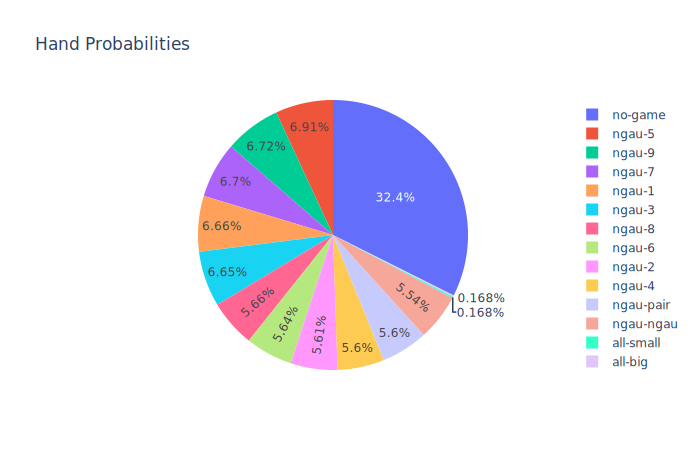

In [12]:
import plotly.express as px
import pandas as pd

# plot the result
fig = px.pie(pd.DataFrame({'index': [k for k in hand_count.keys()], 'prob': [v for v in hand_count.values()]}), names='index', values='prob', title='Hand Probabilities')
fig.show(renderer="svg")

In [14]:
## Comparison of two different hands

# setting up comparison dict by assigning explicit score to according to hand value
win_hierarchy = {'all-big': 13, 'all-small': 12, 'ngau-pair': 11, 'ngau-ngau': 10, 'no-game': 0} 
for x in range(1,10):
    win_hierarchy[f'ngau-{x}'] = x

win_payout = {'all-big': 5, 'all-small': 5, 'ngau-pair': 5, 'ngau-ngau': 4, 'ngau-9': 3, 'ngau-8': 2, 'ngau-7': 2, 'no-game': 1}
for x in range(1,7):
    win_payout[f'ngau-{x}'] = 1

card_dict = {'J':11, 'Q':12, 'K': 13}
for x in range(1,11):
    card_dict[str(x)] = x


# return winner for a list of high cards
def compare_sorted_list(a, b):
    if a and b:
        if a[0] > b[0]:
            return 0
        if a[0] < b[0]:
            return 1
        if a[0] == b[0]:
            return compare_sorted_list(a[1:], b[1:])
    else:
        return None


# comparison under no-game tie scenario
# return winner_idx
def compare_five_cards(h1, h2):
    winner_idx = None

    # check for number of pairs in the 5 cards
    h1_n = sorted([card_dict[h[1:]] for h in h1], reverse=True)
    h1_pairs = sorted([k for k, v in Counter(h1_n).items() if v > 1], reverse=True)

    h2_n = sorted([card_dict[h[1:]] for h in h2], reverse=True)
    h2_pairs = sorted([k for k, v in Counter(h2_n).items() if v > 1], reverse=True)

    if len(h1_pairs) > len(h2_pairs):
        winner_idx = 0
    elif len(h1_pairs) < len(h2_pairs):
        winner_idx = 1
    elif h1_pairs: # when len(h1_pairs) == len(h2_pairs) != 0
        winner_idx = compare_sorted_list(h1_pairs, h2_pairs)
    else: # when len(h1_pairs) == len(h2_pairs) == 0
        winner_idx = compare_sorted_list(h1_n, h2_n)
    
    return winner_idx


def payout_handler(winner_idx, winner_hand):
    # no payout for tie
    if winner_idx is None:
        return (0,0)
    else:
        mult = win_payout[winner_hand]
        payout = (mult, mult * -1) if winner_idx==0 else (mult * -1, mult)
        return payout


# input of h1, h2 should be two lists
# winner_idx = 0 means h1 wins; h2 if winner_idx = 1
# return a tuple representing result of pnl
def comparison(h1, h2):
    h1_hand = best_arrangement(h1)
    h2_hand = best_arrangement(h2)
    h1_pt = win_hierarchy[h1_hand]
    h2_pt = win_hierarchy[h2_hand]

    if h1_pt > h2_pt:
        winner_idx, winner_hand = 0, h1_hand
    elif h1_pt < h2_pt:
        winner_idx, winner_hand = 1, h2_hand
    else:
        # tie cases when both players got "no-game"
        if h1_pt == 0:
            winner_idx, winner_hand = compare_five_cards(h1, h2), 'no-game'
        else:
            winner_idx, winner_hand = None, h1_hand
    return payout_handler(winner_idx, winner_hand)


# Demonstration
for _ in range(3):
    h1 = get_random_card(random.random())
    h2 = get_random_card(random.random())
    print(f'h1 cards are {h1}')
    print(f'h2 cards are {h2}')
    print(comparison(h1, h2))
    print('-----------------')

h1 cards are ['SQ', 'S3', 'H3', 'HJ', 'D5']
h2 cards are ['S9', 'D1', 'DQ', 'H7', 'C1']
(-2, 2)
-----------------
h1 cards are ['DQ', 'S9', 'S10', 'H2', 'DJ']
h2 cards are ['H5', 'D10', 'S1', 'C6', 'C2']
(1, -1)
-----------------
h1 cards are ['S3', 'D3', 'D5', 'C9', 'C4']
h2 cards are ['C8', 'D6', 'C1', 'S2', 'H8']
(1, -1)
-----------------


## Theoretical expectation value of banker

In [ ]:
# parallelized implementation
# not enough computational power to run
"""
Reference of parallelization using mp
https://www.machinelearningplus.com/python/parallel-processing-python/
"""
import multiprocessing as mp

all_hands_two_players = [(h,g) for h in hand for g in hand if h!=g]
print(len(all_hands_two_players))

def theoretical_comparison(h,g):
    return comparison(h,g)[0]

# parallelization
pool = mp.Pool(mp.cpu_count())

all_banker_payoff = []
all_banker_payoff = pool.starmap_async(theoretical_comparison, [(hhs[0],hhs[1]) for hhs in tqdm(all_hands_two_players)]).get()

pool.close()

print(f'Banker\'s theoretical EV is: {sum(all_payoff)/len(all_payoff)}')

## Monte Carlo simulation

In [16]:
from tqdm import tqdm
from collections import Counter

# simulation of playing between 1 chosen banker and n players
player_num = 4
rounds = 30
sessions = 2000


def get_random_card_for_players(player_num):
    return random.sample(deck, (player_num+1)*5)


def initialize_game(player_num):
    pnl = {'banker': []}
    for n in range(player_num):
        pnl[f'player-{n}'] = []
    return pnl


def one_session(rounds, player_num):
    pnl = initialize_game(player_num)
    for _ in range(rounds):
        hands_dict = {}
        # get all cards at one time as there are correlations between hands (draw from same deck)
        return_cards = get_random_card_for_players(player_num)
        for idx, k in enumerate(pnl.keys()):
            hands_dict[k] = return_cards[idx*5:(idx+1)*5]
        # banker compare with each player
        banker_payoff = 0
        for k, v in hands_dict.items():
            if k != 'banker':
                payoff = comparison(hands_dict['banker'], v)
                banker_payoff += payoff[0]
                pnl[k].append(payoff[1])
        pnl['banker'].append(banker_payoff)
    return {k: sum(v) for k,v in pnl.items()}


def play_sessions(rounds, player_num, sessions):
    pnl_list = []
    for _ in tqdm(range(sessions), desc=f'r={rounds}, n={player_num}'):
        pnl = one_session(rounds, player_num)
        pnl_list.append(pnl)
    return pnl_list


result = play_sessions(rounds, player_num, sessions)

r=30, n=4: 100%|██████████| 2000/2000 [00:24<00:00, 82.03it/s]


In [17]:
import pandas as pd

# analysis
dflist = []
for y in result:
    for k, v in y.items():
        dflist.append({'pnl':v, 'player':k})
# df = pd.DataFrame(result)
df = pd.DataFrame(dflist)
df.head(10)

,pnl,player
0,-35,banker
1,15,player-0
2,-2,player-1
3,16,player-2
4,6,player-3
5,14,banker
6,-8,player-0
7,-8,player-1
8,-10,player-2
9,12,player-3


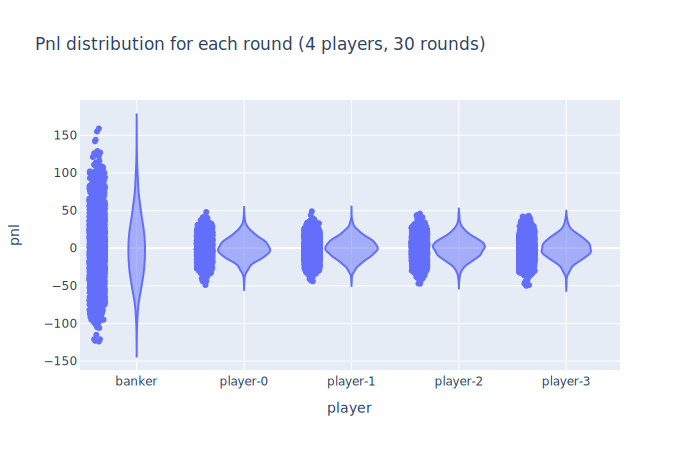

In [20]:
import plotly.express as px

fig = px.violin(df, x='player', y='pnl', points='all', title='Pnl distribution for each round (4 players, 30 rounds)')
fig.show('svg')

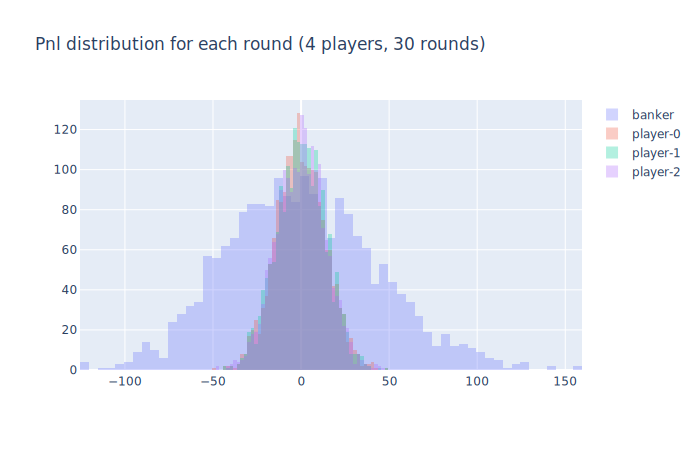

In [21]:
import plotly.graph_objects as go

fig = go.Figure()
for x in ['banker', 'player-0', 'player-1', 'player-2']:
    fig.add_trace(go.Histogram(x=df[df.player==x]['pnl'], name=x))
fig.update_layout(barmode='overlay', title='Pnl distribution for each round (4 players, 30 rounds)')
fig.update_traces(opacity=0.3)
fig.show('svg')

In [22]:
from scipy.stats import kurtosis, skew
from scipy.stats.mstats import mquantiles
import statistics
import numpy as np


def stat_of(df, player):
    data = df[df.player==player]['pnl']
    mean = statistics.mean(data)
    var =  statistics.variance(data)
    sd = statistics.stdev(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    qts = list(mquantiles(data, prob=np.linspace(0, 1, num=11)))
    return {'mean': mean, 'var': var, 'sd': sd, 'skewness': skewness, 'kurt': kurt, 'quantiles': qts}


def session_stat(session_result):
    # make analysis df
    dflist = []
    list_of_players = session_result[0].keys()

    for y in session_result:
        for k, v in y.items():
            dflist.append({'pnl':v, 'player':k})
    session_df = pd.DataFrame(dflist)
    
    session_stat_dict = {}
    for p in list_of_players:
        session_stat_dict[p] = stat_of(session_df, p)
    return session_stat_dict

# demo
tmp_session_result = play_sessions(5, 4, 20)
session_stat(tmp_session_result)

r=5, n=4: 100%|██████████| 20/20 [00:00<00:00, 397.96it/s]


{'banker': {'mean': -0.45,
  'var': 153.31315789473683,
  'sd': 12.381969063712639,
  'skewness': 0.3070791781337764,
  'kurt': -1.0756964633356374,
  'quantiles': [-18.0,
   -15.0,
   -14.0,
   -9.54,
   -3.5199999999999996,
   -2.5,
   1.6000000000000068,
   6.540000000000003,
   12.239999999999995,
   18.159999999999997,
   22.0]},
 'player-0': {'mean': 0.35,
  'var': 10.660526315789474,
  'sd': 3.265046142980138,
  'skewness': 0.1543074567903067,
  'kurt': -0.8352653263582495,
  'quantiles': [-5.0,
   -4.0,
   -3.0,
   -1.5399999999999991,
   0.0,
   0.0,
   1.0,
   2.0,
   3.0,
   5.579999999999998,
   6.0]},
 'player-1': {'mean': 0.05,
  'var': 25.207894736842107,
  'sd': 5.020746432239146,
  'skewness': -0.8852488882181375,
  'kurt': 0.7517069306824506,
  'quantiles': [-13.0,
   -7.32,
   -2.5599999999999996,
   -1.0,
   -1.0,
   0.5,
   1.0,
   3.0,
   4.0,
   6.579999999999998,
   7.0]},
 'player-2': {'mean': -0.65,
  'var': 21.818421052631578,
  'sd': 4.67101927341684,
  'ske

## Parallelized implementation

In [26]:
"""
Reference of parallelization using mp
https://www.machinelearningplus.com/python/parallel-processing-python/
Async starmap is used
"""
import multiprocessing as mp
import json

# search for statistical result for change in parameters
def grid_search_once(n, r, sessions=1000):
    tmp_session_result = play_sessions(r, n, sessions)
    return {str((n,r)): session_stat(tmp_session_result)}


def parallel_grid_search(player_num, rounds, sessions=1000):
    # parallelization
    param_list = [(n,r) for n in player_num for r in rounds]
    pool = mp.Pool(mp.cpu_count())

    sessions_results = []
    sessions_results = pool.starmap_async(grid_search_once, [(pl[0], pl[1]) for pl in param_list]).get()

    pool.close()
    final_result = {}
    for d in sessions_results:
        final_result.update(d)
    return final_result

# player_num must be 2 or above; rounds must be >= 1
grid = parallel_grid_search(player_num=list(range(2,9)), rounds=list(range(20, 110, 10)))

# write to file
with open('result.json', 'w+') as fp:
    json.dump(grid, fp)

r=90, n=8: 100%|██████████| 1000/1000 [01:47<00:00,  9.31it/s]


In [18]:
# unparalleled implementation; computationally slow so do not run

def grid_search(player_num, rounds, sessions=1000):
    grid = {}
    for n in player_num:
        for r in rounds:
            tmp_session_result = play_sessions(r, n, sessions)
            grid[(n,r)] = session_stat(tmp_session_result)
    return grid

# player_num must be 2 or above; rounds must be >= 1
grid_search(player_num=list(range(2,3)), rounds=list(range(20, 50, 10)))

## Visualisation of Banker's Statistical Moments

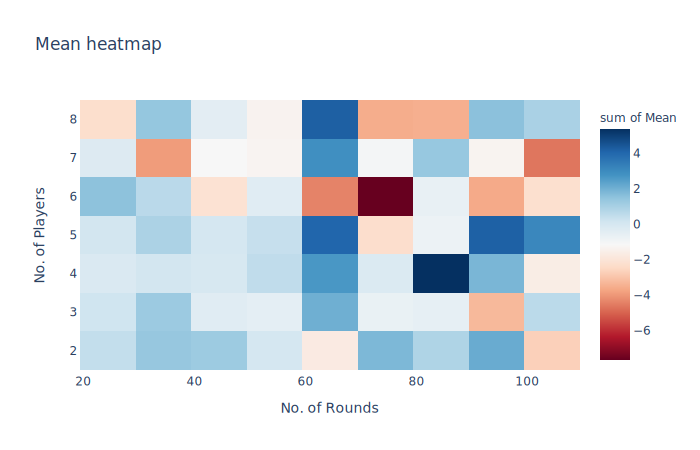

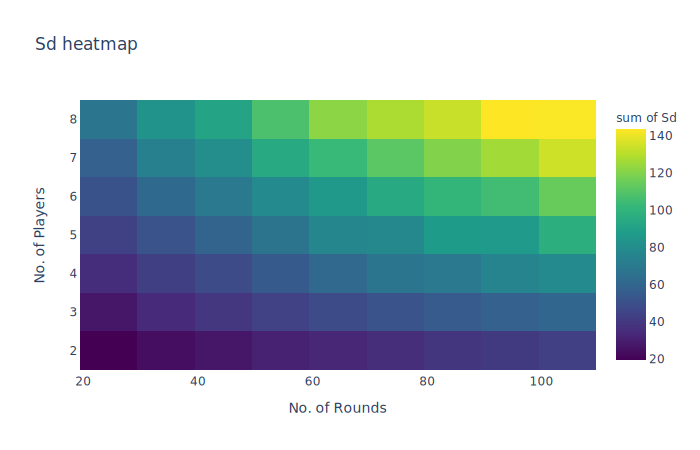

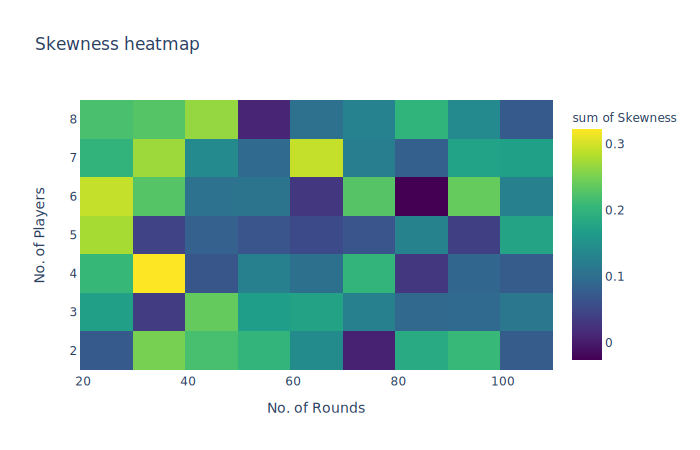

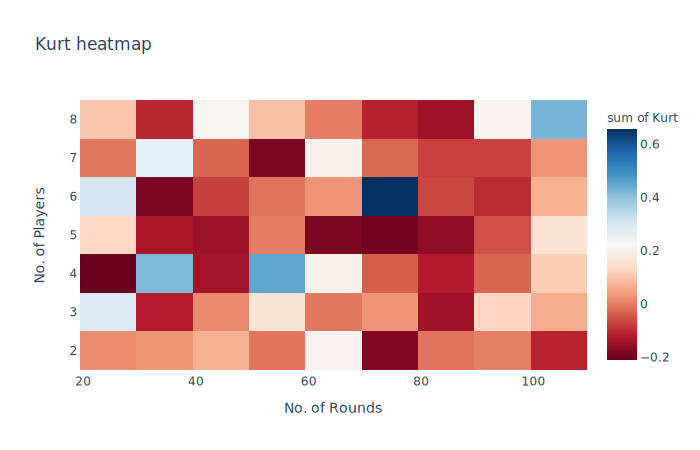

In [52]:
import plotly.express as px

moments = {'mean':'RdBU', 'sd':'Viridis', 'skewness':'Viridis', 'kurt':'RdBU'}

for m, scale in moments.items():
    # dimensions
    dots_x = [eval(k)[1] for k,v in grid.items()]
    dots_y = [eval(k)[0] for k,v in grid.items()]
    dots_color = [v['banker'][m] for v in grid.values()]
    labels = {'x':'No. of Rounds', 'y':'No. of Players', 'z':f'{m.capitalize()}'}

    fig = px.density_heatmap(x=dots_x, y=dots_y, z=dots_color, nbinsx=9, nbinsy=8, color_continuous_scale=scale, title=f'{m.capitalize()} heatmap', labels=labels)
    fig.show('svg')

## Forecasting risk from players and rounds

In [ ]:
# fit a regression for different combinations of players, rounds on standard deviation
# banker's risk vs players' risk
